In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True)

In [3]:
bechdel_df = pd.read_csv('my_data/my_data_not_using/updated_bechdel_7.csv')
bechdel_df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,1,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0,0.0,0.0,0.0


In [7]:
bechdel_df.drop(columns=['imdb_id', 'score', 'budget', 'revenue'], inplace=True)
bechdel_df.head()

,year,title,passing,director_gender,writer_gender,producer_gender,overall_gender
0,2019.0,Alita: Battle Angel,1.0,0.0,1.0,0,1.0
1,2019.0,Close,1.0,1.0,1.0,0,2.0
2,2019.0,Cold Pursuit,0.0,0.0,0.0,0,0.0
3,2019.0,The Kid Who Would Be King,0.0,0.0,0.0,1,1.0
4,2019.0,Polar,0.0,0.0,0.0,0,0.0


In [10]:
bechdel_df.rename({'director_gender': 'director', 'writer_gender': 'writer', 'producer_gender': 'producer', 'overall_gender':\
                  'overall'}, axis=1, inplace=True)
bechdel_df.tail()

,year,title,passing,director,writer,producer,overall
7566,2013.0,Future Shift,1.0,1.0,1.0,1,3.0
7567,2013.0,The Immigrant,1.0,0.0,0.0,0,0.0
7568,2013.0,Lost In Living,1.0,1.0,0.0,1,2.0
7569,2012.0,All I Want Is Everything,1.0,1.0,1.0,0,2.0
7570,2019.0,Captain Marvel,1.0,1.0,1.0,1,3.0


In [16]:
bechdel_df.passing.replace({'N':0,'Y':1}, inplace=True)
bechdel_df.head()

,year,title,passing,director,writer,producer,overall
0,2019.0,Alita: Battle Angel,1,0.0,1.0,0,1.0
1,2019.0,Close,1,1.0,1.0,0,2.0
2,2019.0,Cold Pursuit,0,0.0,0.0,0,0.0
3,2019.0,The Kid Who Would Be King,0,0.0,0.0,1,1.0
4,2019.0,Polar,0,0.0,0.0,0,0.0


In [17]:
bechdel_df.to_csv('my_data/condensed_bechdel_7.csv', index=False)

## I. Explore overall comparisons of passing vs non-passing movies

### A. Budget & Revenue

In [3]:
bechdel_df.groupby('passing').mean()

,year,score,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget,revenue
passing,,,,,,,,,
0.0,1991.026761,1.000615,0.035681,0.083359,0.015995,0.123962,0.258997,2.116392e+07,6.638363e+07
1.0,1998.387666,3.000000,0.141449,0.224897,0.026364,0.174461,0.566942,1.661094e+07,5.806191e+07


Observation: budget and revenue are not easily interpretable as such large numbers. Scaling and using only non-zero values to determine the mean would help.

#### Non-zero values only

In [11]:
budget_and_revenue_df = df[(df.budget != 0) & (df.revenue != 0)]
budget_and_revenue_df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,alita: battle angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
8,2018.0,a quiet place,1.0,0.0,tt6644200,0.0,0.0,0,0.0,17000000.0,340939361.0
9,2018.0,a simple favor,3.0,1.0,tt7040874,0.0,1.0,1,2.0,20000000.0,42600000.0
10,2018.0,a star is born,3.0,1.0,tt1517451,0.0,1.0,0,1.0,36000000.0,403588149.0
11,2018.0,a wrinkle in time,3.0,1.0,tt1620680,1.0,1.0,1,3.0,100000000.0,132675864.0


In [12]:
budget_and_revenue_df.shape

(3461, 11)

#### Scale budget and revenue values to millions

In [13]:
budget_and_revenue_df.budget = budget_and_revenue_df.budget / 1e6
budget_and_revenue_df.head()

/anaconda3/envs/learn-env/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,alita: battle angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170.0,359700000.0
8,2018.0,a quiet place,1.0,0.0,tt6644200,0.0,0.0,0,0.0,17.0,340939361.0
9,2018.0,a simple favor,3.0,1.0,tt7040874,0.0,1.0,1,2.0,20.0,42600000.0
10,2018.0,a star is born,3.0,1.0,tt1517451,0.0,1.0,0,1.0,36.0,403588149.0
11,2018.0,a wrinkle in time,3.0,1.0,tt1620680,1.0,1.0,1,3.0,100.0,132675864.0


In [14]:
budget_and_revenue_df.revenue = budget_and_revenue_df.revenue / 1e6
budget_and_revenue_df.rename(index=str, columns={'budget': 'budget_millions', 'revenue': 'revenue_millions'}, inplace=True)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
budget_and_revenue_df.tail()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget_millions,revenue_millions
7546,2008.0,the tale of despereaux,3.0,1.0,tt0420238,0.0,0.0,1,1.0,60.0,86.9
7547,2007.0,rush hour 3,1.0,0.0,tt00293564,0.0,0.0,0,0.0,140.0,258.0
7550,1999.0,pokemon: the movie 2000,3.0,1.0,tt0210234,0.0,0.0,1,1.0,30.0,133.9
7567,2013.0,the immigrant,3.0,1.0,tt1951181,0.0,0.0,0,0.0,16.0,5.9
7570,2019.0,captain marvel,3.0,1.0,tt4154664,1.0,1.0,1,3.0,160.0,890.0


In [16]:
budget_and_revenue_df.to_csv('my_data/non_zero_scaled_budgets_revenues_3.csv', index=False)

In [17]:
# budget_and_revenue_df = pd.read_csv('my_data/non_zero_scaled_budgets_revenues.csv')
budget_and_revenue_df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget_millions,revenue_millions
0,2019.0,alita: battle angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170.0,359.700000
8,2018.0,a quiet place,1.0,0.0,tt6644200,0.0,0.0,0,0.0,17.0,340.939361
9,2018.0,a simple favor,3.0,1.0,tt7040874,0.0,1.0,1,2.0,20.0,42.600000
10,2018.0,a star is born,3.0,1.0,tt1517451,0.0,1.0,0,1.0,36.0,403.588149
11,2018.0,a wrinkle in time,3.0,1.0,tt1620680,1.0,1.0,1,3.0,100.0,132.675864


In [18]:
budget_and_revenue_df.groupby('passing').budget_millions.agg(['min', 'max', 'sum', 'mean', 'median'])

,min,max,sum,mean,median
passing,,,,,
0.0,0.000001,350.0,64522.638628,40.940761,25.0
1.0,0.000003,400.0,67498.894579,35.808432,20.0


In [16]:
budget_and_revenue_df.groupby('passing').revenue_millions.agg(['min', 'max', 'sum', 'mean', 'median'])

,min,max,sum,mean,median
passing,,,,,
0.0,0.000001,3920.000000,211961.741212,132.891374,59.600000
1.0,0.000005,2187.463944,247542.412182,130.080090,52.304001


#### Movies with minimum and maximum budgets

In [29]:
budget_and_revenue_df.loc[budget_and_revenue_df.budget_millions == budget_and_revenue_df.budget_millions.min()]

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget_millions,revenue_millions
7309,1935.0,A Night At The Opera,1.0,0.0,tt0026778,0.0,0.0,0.0,0.0,0.0,0.000001,0.000001


In [30]:
budget_and_revenue_df.loc[budget_and_revenue_df.budget_millions == budget_and_revenue_df.budget_millions.max()]

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget_millions,revenue_millions
21,2018.0,Avengers: Infinity War,3.0,1.0,tt4154756,0.0,0.0,1.0,0.0,1.0,400.0,678.815482


#### Movies with minimum and maximum revenues

In [31]:
budget_and_revenue_df.loc[budget_and_revenue_df.revenue_millions == budget_and_revenue_df.revenue_millions.min()]

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget_millions,revenue_millions
7309,1935.0,A Night At The Opera,1.0,0.0,tt0026778,0.0,0.0,0.0,0.0,0.0,0.000001,0.000001


In [32]:
budget_and_revenue_df.loc[budget_and_revenue_df.revenue_millions == budget_and_revenue_df.revenue_millions.max()]

,year,title,score,passing,imdb_id,director_gender,writer_gender,exec_gender,producer_gender,overall_gender,budget_millions,revenue_millions
2556,2009.0,3 Idiots,1.0,0.0,tt1187043,0.0,0.0,0.0,0.0,0.0,350.0,3920.0


Observation: the min and max movies above demonstrate a problem with movie data, where there is not really one source for "ground truth" information. User submitted information can have errors, some websites may list revenue just in the US or revenue globally, financial data for international films may not be in US Dollars, older financial information may or may not be adjusted for inflation, and missing data may be represented in different ways. The budget and revenue for A Night at the Opera, for example, were probably not $1, and it is well known that Infinity War broke several box office records, with revenue in the billions - not millions.  

Update: The budget and revenue for A Night at the Opera were actually both around 1 million dollars according to Wikipedia, so perhaps the numbers were already scaled.

In [20]:
budget_and_revenue_df.reset_index(inplace=True)

In [22]:
budget_and_revenue_df.loc[budget_and_revenue_df.title == 'a night at the opera']

,index,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget_millions,revenue_millions
3426,7268,1935.0,a night at the opera,1.0,0.0,tt0026778,0.0,0.0,0,0.0,0.000001,0.000001


In [23]:
budget_and_revenue_df.iloc[3426]

index                               7268
year                                1935
title               a night at the opera
score                                  1
passing                                0
imdb_id                        tt0026778
director_gender                        0
writer_gender                          0
producer_gender                        0
overall_gender                         0
budget_millions                    1e-06
revenue_millions                   1e-06
Name: 3426, dtype: object

In [24]:
budget_and_revenue_df.at[3426,'budget_millions'] = 1
budget_and_revenue_df.at[3426,'revenue_millions'] = 1.8

In [25]:
budget_and_revenue_df.query("title == 'avengers: infinity war'")

,index,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget_millions,revenue_millions
10,20,2018.0,avengers: infinity war,3.0,1.0,tt4154756,0.0,0.0,1,1.0,400.0,678.815482


In [29]:
budget_and_revenue_df.at[10,'revenue_millions'] = 2048

In [33]:
sorted_budget_and_revenue = budget_and_revenue_df.sort_values(by=['revenue_millions'], ascending=False)
sorted_budget_and_revenue.head()

,index,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget_millions,revenue_millions
1283,2534,2009.0,3 idiots,1.0,0.0,tt1187043,0.0,0.0,0,0.0,350.0,3920.000000
1299,2563,2009.0,avatar,2.0,0.0,tt0499549,0.0,0.0,0,0.0,237.0,2787.965087
2549,4888,1997.0,titanic,3.0,1.0,tt0120338,0.0,0.0,0,0.0,200.0,2187.463944
450,794,2015.0,star wars: the force awakens,3.0,1.0,tt2488496,0.0,0.0,1,1.0,245.0,2068.223624
10,20,2018.0,avengers: infinity war,3.0,1.0,tt4154756,0.0,0.0,1,1.0,400.0,2048.000000


In [36]:
sorted_budget_and_revenue.tail(20)

,index,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget_millions,revenue_millions
809,1567,2012.0,about cherry,3.0,1.0,tt1945062,0.0,1.0,1,2.0,2.500000,0.003003
821,1599,2012.0,best man down,3.0,1.0,tt1885300,0.0,0.0,0,0.0,1.500000,0.001938
2060,4049,2003.0,the room,3.0,1.0,tt0368226,0.0,0.0,0,0.0,6.000000,0.001800
1350,2678,2009.0,the human centipede (first sequence),3.0,1.0,tt1467304,0.0,0.0,0,0.0,2.011799,0.000252
2320,4508,2000.0,rugrats in paris:,3.0,1.0,tt0213203,0.0,0.0,1,1.0,0.000030,0.000103
3066,5930,1983.0,scarface,1.0,0.0,tt0086250,0.0,0.0,0,0.0,25.000000,0.000066
192,330,2016.0,barbershop: the next cut,3.0,1.0,tt3628584,0.0,0.0,0,0.0,0.000020,0.000055
1571,3154,2007.0,death at a funeral,3.0,1.0,tt0795368,0.0,0.0,0,0.0,9.000000,0.000046
1141,2247,2010.0,boy,1.0,0.0,tt1560139,0.0,0.0,0,0.0,0.000003,0.000043
3031,5863,1984.0,friday the 13th part iv: the final chapter,3.0,1.0,tt0087298,0.0,0.0,0,0.0,2.600000,0.000032


In [ ]:
# alright well a lot of those are messed up, which is what I get for combining datasets and not checking if the values are all scaled
# the same way and also means I have to redo my hypothesis testing

### B. Plotting with Plotly

In [10]:
bechdel_df.passing.value_counts()

1.0    4362
0.0    3251
Name: passing, dtype: int64

In [11]:
budget_and_revenue_df.passing.value_counts()

1.0    1904
0.0    1595
Name: passing, dtype: int64

In [9]:
bechdel_df.passing.value_counts()[1]

4361

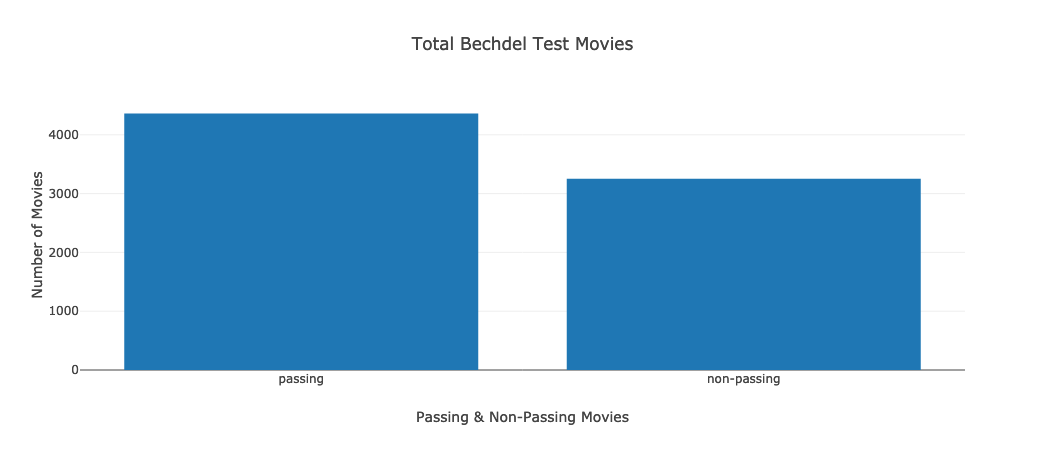

In [12]:
trace = go.Bar(
            x=["passing", "non-passing"],
            y=[bechdel_df.passing.value_counts()[1], bechdel_df.passing.value_counts()[0]]
)
data = [trace]    
layout = go.Layout(title="Total Bechdel Test Movies", xaxis=dict(title="Passing & Non-Passing Movies"), 
                   yaxis=dict(title="Number of Movies"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [13]:
year_counts = bechdel_df.groupby(['year']).size()

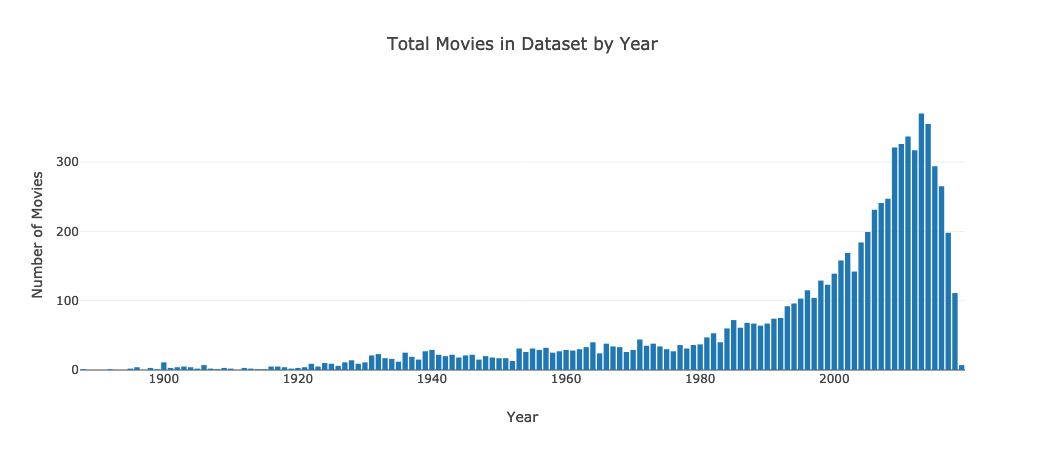

In [14]:
trace = go.Bar(
            x=[year for year in year_counts.index],
            y=[count for count in year_counts.values]
)
data = [trace]    
layout = go.Layout(title="Total Movies in Dataset by Year", xaxis=dict(title="Year"), 
                   yaxis=dict(title="Number of Movies"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [15]:
gender_columns = bechdel_df.columns[5:10]

In [16]:
bechdel_df.groupby('passing')[gender_columns].sum()

,director_gender,writer_gender,exec_gender,producer_gender,overall_gender
passing,,,,,
0.0,116.0,271.0,52.0,403.0,842.0
1.0,617.0,981.0,115.0,761.0,2473.0


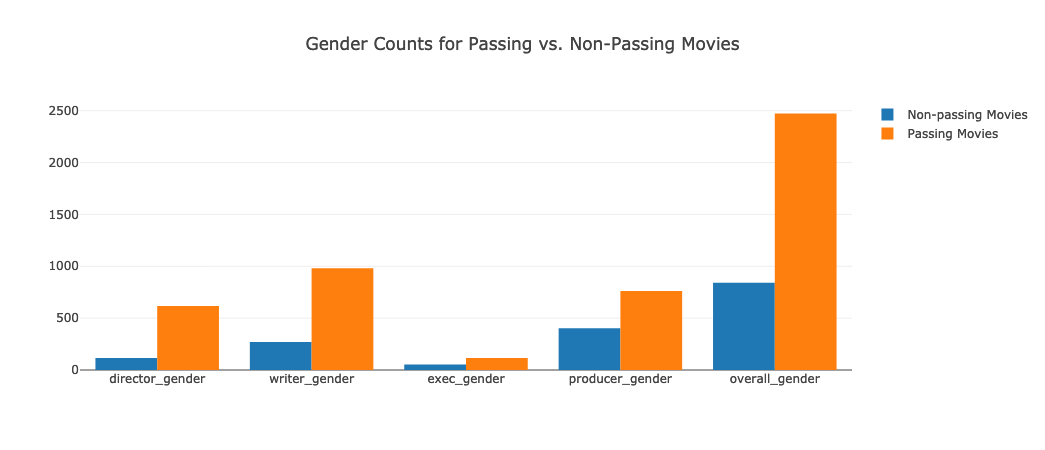

In [17]:
trace0 = go.Bar(
    x=[col for col in gender_columns],
    y=[val for val in bechdel_df.groupby('passing')[gender_columns].sum().values[0]],
    name='Non-passing Movies'
)

trace1 = go.Bar(
    x=[col for col in gender_columns],
    y=[val for val in bechdel_df.groupby('passing')[gender_columns].sum().values[1]],
    name='Passing Movies'
)
data = [trace0, trace1]    

layout = go.Layout(
    title="Gender Counts for Passing vs. Non-Passing Movies",
    barmode=('group')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
# this plot needs to be modified so easier to understand

In [18]:
passing_gender_counts = bechdel_df[bechdel_df['passing'] == 1]
non_passing_gender_counts = bechdel_df[bechdel_df['passing'] == 0]

In [19]:
passing_by_year = passing_gender_counts.groupby('year')['passing'].count()
non_passing_by_year = non_passing_gender_counts.groupby('year')['passing'].count()

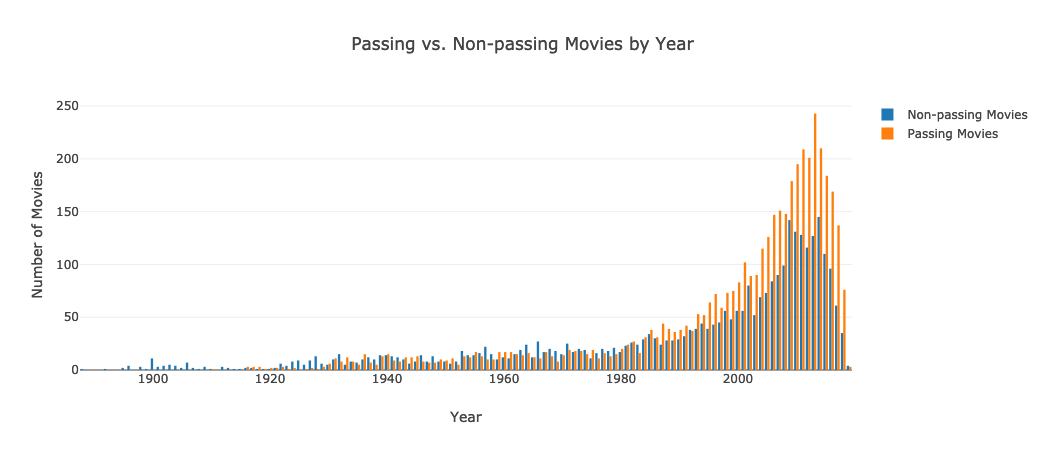

In [20]:
trace0 = go.Bar(
    x=[year for year in non_passing_by_year.index],
    y=[count for count in non_passing_by_year.values],
    name='Non-passing Movies'    
)

trace1 = go.Bar(
    x=[year for year in passing_by_year.index],
    y=[count for count in passing_by_year.values],
    name='Passing Movies'    
)

data = [trace0, trace1]    
layout = go.Layout(
    title="Passing vs. Non-passing Movies by Year", 
    xaxis=dict(title="Year"), 
    yaxis=dict(title="Number of Movies"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [21]:
presence_of_ur_gender_by_year = bechdel_df.groupby('year')['overall_gender'].sum()

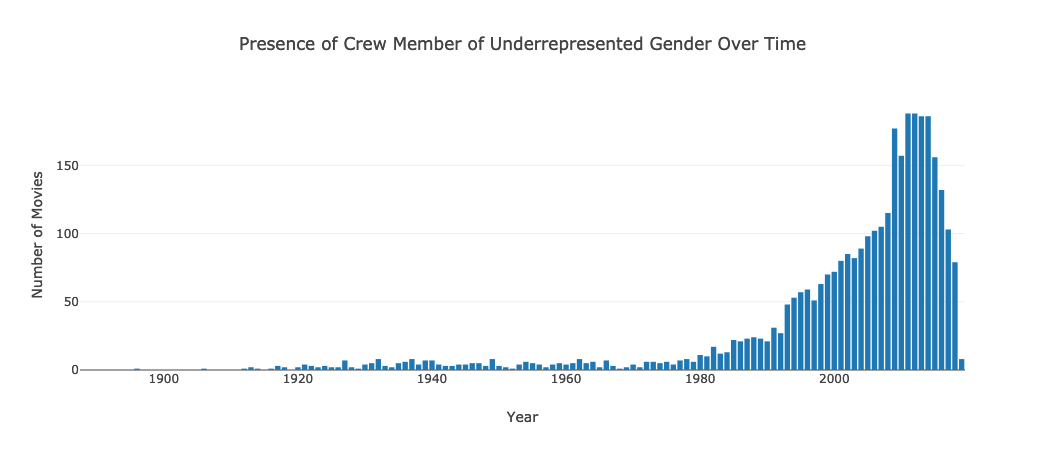

In [22]:
trace = go.Bar(
            x=[year for year in presence_of_ur_gender_by_year.index],
            y=[count for count in presence_of_ur_gender_by_year.values]
)
data = [trace]    
layout = go.Layout(title="Presence of Crew Member of Underrepresented Gender Over Time", xaxis=dict(title="Year"), 
                   yaxis=dict(title="Number of Movies"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [23]:
passing_movies = bechdel_df[bechdel_df['passing'] == 1]
non_passing_movies = bechdel_df[bechdel_df['passing'] == 0]

In [24]:
ur_gender_passing = passing_movies.groupby('year')['overall_gender'].sum()
ur_gender_non_passing = non_passing_movies.groupby('year')['overall_gender'].sum()

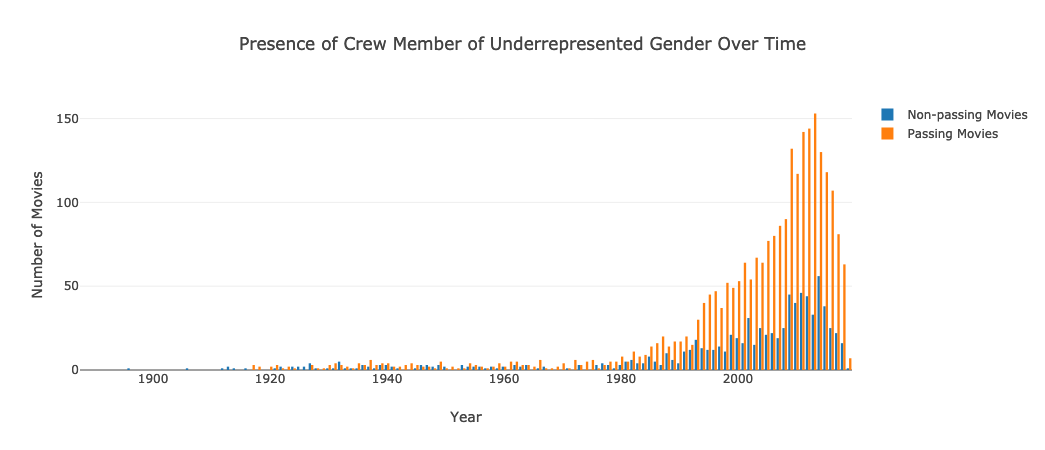

In [25]:
trace0 = go.Bar(
    x=[year for year in ur_gender_non_passing.index],
    y=[count for count in ur_gender_non_passing.values],
    name='Non-passing Movies'    
)

trace1 = go.Bar(
    x=[year for year in ur_gender_passing.index],
    y=[count for count in ur_gender_passing.values],
    name='Passing Movies'    
)

data = [trace0, trace1]    
layout = go.Layout(
    title="Presence of Crew Member of Underrepresented Gender Over Time", 
    xaxis=dict(title="Year"), 
    yaxis=dict(title="Number of Movies"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### C. Plot Budget and Revenue Values
* Note: only about half the dataset contains movies with both non-zero budget and revenue values

In [3]:
df = pd.read_csv('my_data/updated_bechdel_7.csv')
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,1,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0,0.0,0.0,0.0


In [26]:
print(bechdel_df.shape)
print(budget_and_revenue_df.shape)

(7613, 12)
(3499, 12)


In [27]:
budget_and_revenue_df.groupby('passing').budget_millions.agg(['min', 'max', 'sum', 'mean', 'median'])

,min,max,sum,mean,median
passing,,,,,
0.0,0.000001,350.0,66011.138628,41.386294,25.0
1.0,0.000003,400.0,69191.694579,36.340176,20.0


In [28]:
mean_median_budget = budget_and_revenue_df.groupby('passing').budget_millions.agg(['mean', 'median'])
mean_median_budget

,mean,median
passing,,
0.0,41.386294,25.0
1.0,36.340176,20.0


In [29]:
mean_median_budget.values[0]

array([41.38629381, 25.        ])

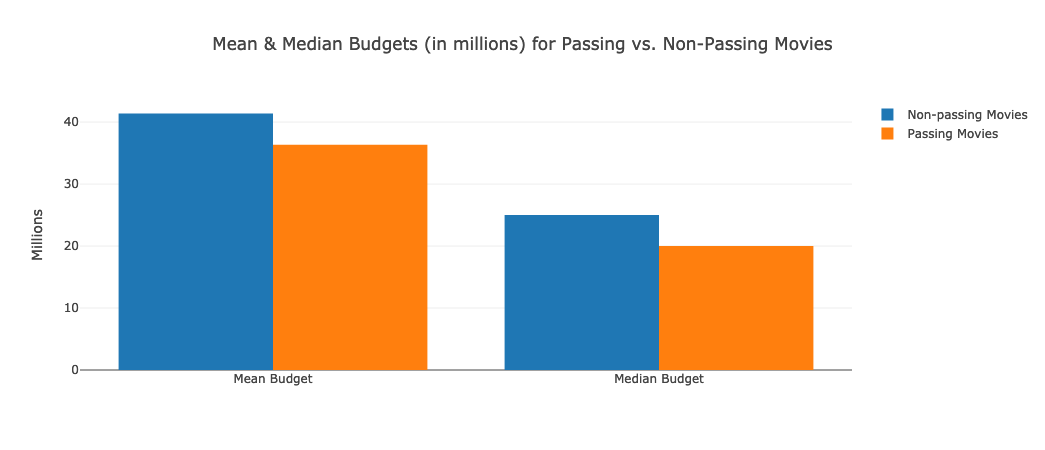

In [30]:
trace0 = go.Bar(
    x=['Mean Budget', 'Median Budget'],
    y=[val for val in mean_median_budget.values[0]],
    name='Non-passing Movies'    
)

trace1 = go.Bar(
    x=['Mean Budget', 'Median Budget'],
    y=[val for val in mean_median_budget.values[1]],
    name='Passing Movies'    
)

data = [trace0, trace1]    
layout = go.Layout(
    title="Mean & Median Budgets (in millions) for Passing vs. Non-Passing Movies", 
    yaxis=dict(title="Millions"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [31]:
mean_median_revenue = budget_and_revenue_df.groupby('passing').revenue_millions.agg(['mean', 'median'])
mean_median_revenue

,mean,median
passing,,
0.0,132.891374,59.600000
1.0,130.479208,52.364267


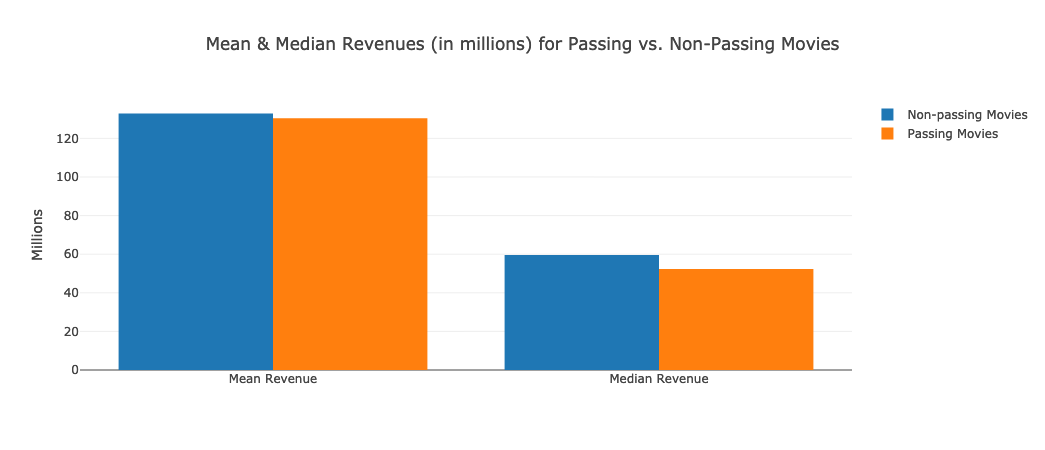

In [32]:
trace0 = go.Bar(
    x=['Mean Revenue', 'Median Revenue'],
    y=[val for val in mean_median_revenue.values[0]],
    name='Non-passing Movies'    
)

trace1 = go.Bar(
    x=['Mean Revenue', 'Median Revenue'],
    y=[val for val in mean_median_revenue.values[1]],
    name='Passing Movies'    
)

data = [trace0, trace1]    
layout = go.Layout(
    title="Mean & Median Revenues (in millions) for Passing vs. Non-Passing Movies", 
    yaxis=dict(title="Millions"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [33]:
passing_movies = budget_and_revenue_df[budget_and_revenue_df.passing == 1]
non_passing_movies = budget_and_revenue_df[budget_and_revenue_df.passing == 0]

In [34]:
passing_movies.groupby('year')['budget_millions'].agg(['mean', 'median']).tail()

,mean,median
year,,
2015.0,47.412551,19.00
2016.0,48.781571,23.25
2017.0,54.319512,29.50
2018.0,70.659338,42.00
2019.0,165.000000,165.00


In [35]:
non_passing_movies.groupby('year')['budget_millions'].agg(['mean', 'median']).tail()

,mean,median
year,,
2014.0,54.006632,27.5
2015.0,54.165455,40.0
2016.0,58.080952,40.0
2017.0,71.044444,42.5
2018.0,72.285714,51.0


#### Budget Values over the Years
* Budget seems to be the more informative / interesting value because there is a more noticeable difference than in revenue

In [36]:
passing_movies_budget_mean = passing_movies.groupby('year')['budget_millions'].mean()
passing_movies_budget_median = passing_movies.groupby('year')['budget_millions'].median()

non_passing_budget_mean = non_passing_movies.groupby('year')['budget_millions'].mean()
non_passing_budget_median = non_passing_movies.groupby('year')['budget_millions'].median()

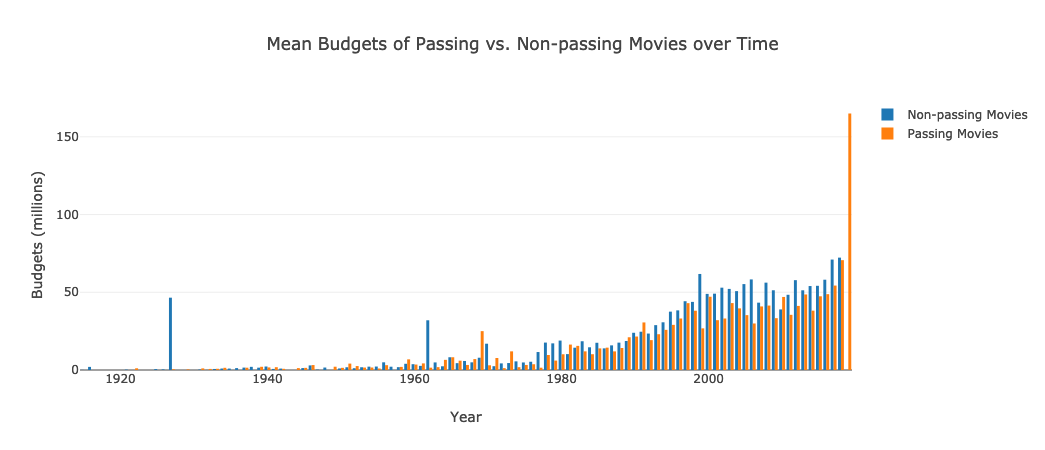

In [37]:
trace0 = go.Bar(
    x=[year for year in non_passing_budget_mean.index],
    y=[val for val in non_passing_budget_mean.values],
    name='Non-passing Movies'    
)

trace1 = go.Bar(
    x=[year for year in passing_movies_budget_mean.index],
    y=[val for val in passing_movies_budget_mean.values],
    name='Passing Movies'    
)

data = [trace0, trace1]    
layout = go.Layout(
    title="Mean Budgets of Passing vs. Non-passing Movies over Time", 
    xaxis=dict(title="Year"), 
    yaxis=dict(title="Budgets (millions)"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

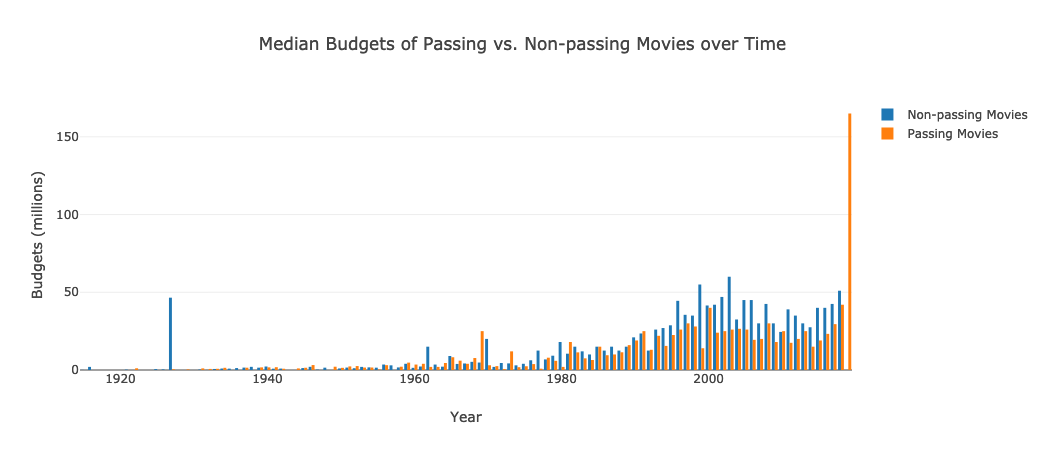

In [38]:
trace0 = go.Bar(
    x=[year for year in non_passing_budget_median.index],
    y=[val for val in non_passing_budget_median.values],
    name='Non-passing Movies'    
)

trace1 = go.Bar(
    x=[year for year in passing_movies_budget_median.index],
    y=[val for val in passing_movies_budget_median.values],
    name='Passing Movies'    
)

data = [trace0, trace1]    
layout = go.Layout(
    title="Median Budgets of Passing vs. Non-passing Movies over Time", 
    xaxis=dict(title="Year"), 
    yaxis=dict(title="Budgets (millions)"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Revenue Values Over the Years

In [39]:
passing_movies_revenues_mean = passing_movies.groupby('year')['revenue_millions'].mean()
non_passing_revenues_mean = non_passing_movies.groupby('year')['revenue_millions'].mean()

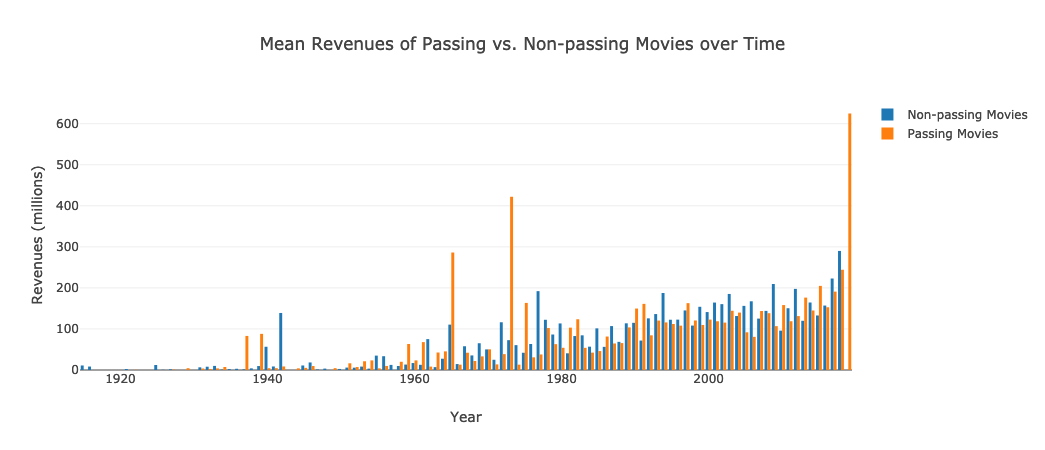

In [40]:
trace0 = go.Bar(
    x=[year for year in non_passing_revenues_mean.index],
    y=[val for val in non_passing_revenues_mean.values],
    name='Non-passing Movies'    
)

trace1 = go.Bar(
    x=[year for year in passing_movies_revenues_mean.index],
    y=[val for val in passing_movies_revenues_mean.values],
    name='Passing Movies'    
)

data = [trace0, trace1]    
layout = go.Layout(
    title="Mean Revenues of Passing vs. Non-passing Movies over Time", 
    xaxis=dict(title="Year"), 
    yaxis=dict(title="Revenues (millions)"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Compare movies within a table

In [2]:
# THERE IS A FEMALE PRODUCER FOR EDGE OF TOMORROW - which I only found out by going to IMDB and searching this specifically
# HOW WILL THIS EVER BE ACCURATE AHHHH

In [3]:
df = pd.read_csv('my_data/updated_bechdel_6.csv')
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,1,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0,0.0,0.0,0.0


In [4]:
df.query("title == 'Edge of Tomorrow'")

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
959,2014.0,Edge of Tomorrow,1.0,0.0,tt1631867,0.0,0.0,0,0.0,178000000.0,370500000.0


In [6]:
df.at[959,'producer_gender'] = 1
df.at[959,'overall_gender'] = 1

In [9]:
# rewrite csv before I forget
# df.to_csv('my_data/updated_bechdel_6.csv', index=False)

In [11]:
df.columns[5:9]

Index(['director_gender', 'writer_gender', 'producer_gender',
       'overall_gender'],
      dtype='object')

In [12]:
df[:10]

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,1,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0,0.0,0.0,0.0
5,2019.0,Serenity,1.0,0.0,tt6476140,0.0,0.0,0,0.0,25000000.0,0.0
6,2018.0,6 Balloons,3.0,1.0,tt6142496,1.0,1.0,0,2.0,0.0,0.0
7,2018.0,A private war,1.0,0.0,tt2368254,0.0,0.0,1,1.0,0.0,0.0
8,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0,0.0,17000000.0,259168321.0
9,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0,0.0,17000000.0,340939361.0


In [ ]:
# omg there are duplicates I thought I got rid of them! 

In [25]:
bechdel_df = df.sort_values(by=['revenue'],ascending=False).drop_duplicates(subset=['title', 'imdb_id'],keep='first').sort_index()

In [30]:
bechdel_df[bechdel_df.duplicated(subset=['title', 'year'], keep=False)]

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
1782,2012.0,One for the Money,3.0,1.0,tt1598828,1.0,1.0,1,3.0,40000000.0,36893721.0
7575,2012.0,One for the Money,3.0,1.0,tt598828,1.0,1.0,1,3.0,0.0,0.0


In [31]:
bechdel_df.drop_duplicates(subset=['title','year'], keep='first', inplace=True)

In [37]:
bechdel_df.to_csv('my_data/updated_bechdel_7.csv', index=False)

In [41]:
bechdel_df.iloc[700].title.lower()

'kung fury'

In [42]:
bechdel_df[300:325]

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
310,2017.0,You Were Never Really Here,1.0,0.0,tt5742374,1.0,1.0,0,2.0,0.0,2528078.0
311,2016.0,10 Cloverfield Lane,3.0,1.0,tt1179933,0.0,0.0,1,1.0,15000000.0,71897215.0
312,2016.0,10 Days In A Madhouse,3.0,1.0,tt3453052,0.0,0.0,0,0.0,1200000.0,0.0
313,2016.0,13 Hours,2.0,0.0,tt4172430,0.0,0.0,0,0.0,50000000.0,69411370.0
314,2016.0,20th Century Women,3.0,1.0,tt4385888,0.0,0.0,1,1.0,7000000.0,5816211.0
315,2016.0,The 5th Wave,2.0,0.0,tt2304933,0.0,1.0,0,1.0,38000000.0,109906372.0
316,2016.0,The 9th Life of Louis Drax,1.0,0.0,tt3991412,0.0,0.0,0,0.0,0.0,288931.0
317,2016.0,A Cure for Wellness,1.0,0.0,tt4731136,0.0,0.0,0,0.0,40000000.0,24209725.0
318,2016.0,A Dark Song,0.0,0.0,tt4805316,0.0,0.0,0,0.0,0.0,0.0
319,2016.0,A Monster Calls,3.0,1.0,tt3416532,0.0,0.0,0,0.0,43000000.0,40919166.0


In [1]:
text = "captain marvel"
text.capitalize()

'Captain marvel'

In [ ]:
# should change all movie titles to lowercase to make it easier to search within app

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('my_data/updated_bechdel_7.csv')
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,1,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0,0.0,0.0,0.0


In [8]:
df.title = df.title.str.lower()

In [9]:
df.head()

,year,title,score,passing,imdb_id,director_gender,writer_gender,producer_gender,overall_gender,budget,revenue
0,2019.0,alita: battle angel,3.0,1.0,tt0437086,0.0,1.0,0,1.0,170000000.0,359700000.0
1,2019.0,close,3.0,1.0,tt5316540,1.0,1.0,0,2.0,0.0,0.0
2,2019.0,cold pursuit,1.0,0.0,tt5719748,0.0,0.0,0,0.0,0.0,0.0
3,2019.0,the kid who would be king,1.0,0.0,tt6811018,0.0,0.0,1,1.0,0.0,0.0
4,2019.0,polar,2.0,0.0,tt4139588,0.0,0.0,0,0.0,0.0,0.0


In [10]:
df.to_csv('my_data/lowercase_bechdel_7.csv', index=False)